# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/user/Desktop/Master Data Science/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.04,0.00,0.01,0.01,LogisticRegression(),1.00,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,1
13,0.04,0.01,0.01,0.00,LogisticRegression(),0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,2
9,0.04,0.00,0.03,0.00,LogisticRegression(),0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,3
18,0.03,0.00,0.02,0.01,LogisticRegression(),1.00,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,4
14,0.05,0.01,0.01,0.00,LogisticRegression(),0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,5
5,0.06,0.01,0.03,0.00,LogisticRegression(),0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,6
10,0.03,0.00,0.01,0.01,LogisticRegression(),0.50,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.83,0.88,0.86,0.02,7
6,0.04,0.00,0.03,0.00,LogisticRegression(),0.25,-1,l2,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.82,0.88,0.86,0.02,8
7,0.00,0.00,0.00,0.00,LogisticRegression(),0.25,-1,none,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,9
4,0.00,0.00,0.00,0.00,LogisticRegression(),0.25,-1,elasticnet,saga,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,9


## EVALUAR

### Predecir sobre validación

In [8]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [9]:
roc_auc_score(val_y, pred)

np.float64(0.8844239530674656)

### Examinar el mejor modelo

In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    solver='saga'))])

In [41]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 3.89125725,  8.47943856,  1.03566403, -2.40433212,  1.54179607,
         0.72393275, -0.67490185, -1.34647841, -0.58903348,  1.71511568,
        -1.11730927, -0.78280951,  2.59249391,  0.37416182,  0.06022905]])

In [43]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'paginas_vistas_visita_mms',
       'visitas_total_mms', 'score_perfil_mms', 'ambito_Select',
       'ult_actividad_Converted to Lead', 'ocupacion_Unemployed',
       'ocupacion_Working Professional',
       'ult_actividad_Chat Conversation',
       'ult_actividad_Page Visited on Website', 'origen_Lead Add Form',
       'descarga_lm_No', 'ambito_Marketing Management'], dtype=object)

In [47]:
pd.DataFrame(data = modelo.best_estimator_.named_steps.algoritmo.coef_,
            columns = modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).unstack()\
    .sort_values(ascending = False)

score_actividad_mms                    0    8.48
tiempo_en_site_total_mms               0    3.89
origen_Lead Add Form                   0    2.59
ocupacion_Working Professional         0    1.72
visitas_total_mms                      0    1.54
ult_actividad_SMS Sent                 0    1.04
score_perfil_mms                       0    0.72
descarga_lm_No                         0    0.37
ambito_Marketing Management            0    0.06
ocupacion_Unemployed                   0   -0.59
ambito_Select                          0   -0.67
ult_actividad_Page Visited on Website  0   -0.78
ult_actividad_Chat Conversation        0   -1.12
ult_actividad_Converted to Lead        0   -1.35
paginas_vistas_visita_mms              0   -2.40
dtype: float64

## REPORTING DEL MODELO

### Gain Chart

In [19]:
# Convert y_true to a NumPy array if it's a pandas Series
y_true = y_true.to_numpy()

# Ordenar las predicciones y las etiquetas reales en función de las probabilidades
sorted_idx = np.argsort(y_pred)[::-1]

# Asegurarse de que y_true y y_pred estén alineados correctamente
sorted_y_true = y_true[sorted_idx]
sorted_y_pred = y_pred[sorted_idx]

# Calcular la ganancia acumulada
cumulative_gain = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)


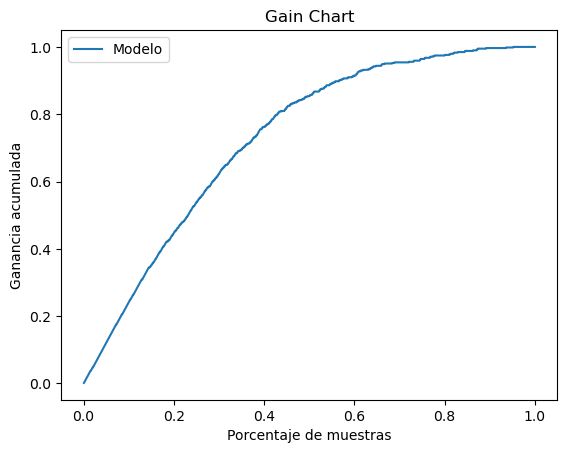

In [34]:
# Crear el gráfico
fig, ax = plt.subplots()

# Graficar la ganancia acumulada, utilizando un eje X de porcentaje
ax.plot(np.arange(1, len(sorted_y_true) + 1) / len(sorted_y_true), cumulative_gain, label='Ganancia acumulada')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje de muestras')
ax.set_ylabel('Ganancia acumulada')
ax.set_title('Gain Chart')

# Añadir leyenda
ax.legend(labels=['Modelo'])

# Mostrar el gráfico
plt.show()


### Lift Chart

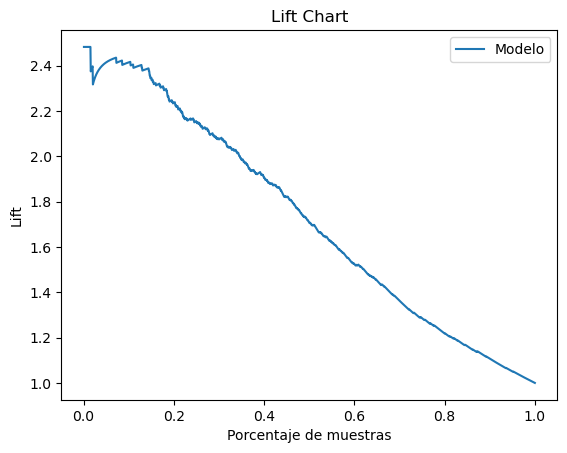

In [37]:
# Calcular la tasa de aciertos en cada percentil
total_positives = np.sum(sorted_y_true)
n = len(sorted_y_true)

# Número de puntos de la curva (por ejemplo, en percentiles)
percentiles = np.arange(1, n + 1) / n

# Calcular el número de positivos por cada percentil
positives_in_percentile = np.cumsum(sorted_y_true)

# Calcular el lift en cada percentil (sin acumulación)
lift = positives_in_percentile / (percentiles * total_positives)

# Crear el gráfico
fig, ax = plt.subplots()

# Graficar el Lift en función del porcentaje de muestras (descendente)
ax.plot(percentiles[::-1], lift[::-1], label='Lift acumulado')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje de muestras')
ax.set_ylabel('Lift')
ax.set_title('Lift Chart')

# Añadir leyenda
ax.legend(labels=['Modelo'])

# Mostrar el gráfico
plt.show()



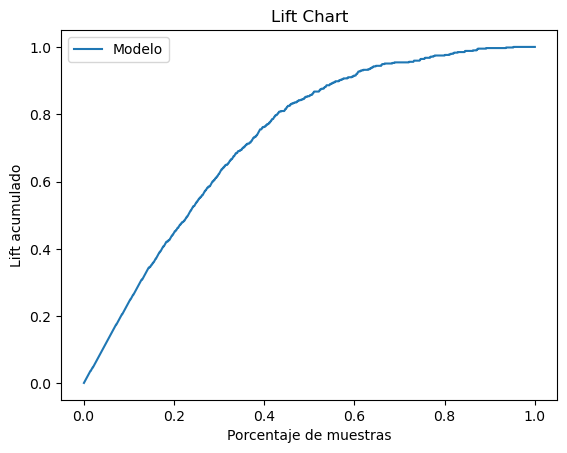

In [35]:
# Crear el gráfico
fig, ax = plt.subplots()

# Graficar el Lift acumulado, con el eje X en porcentaje descendente
ax.plot(np.arange(len(sorted_y_true), 0, -1) / len(sorted_y_true), cumulative_lift[::-1], label='Lift acumulado')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje de muestras')
ax.set_ylabel('Lift acumulado')
ax.set_title('Lift Chart')

# Añadir leyenda
ax.legend(labels=['Modelo'])

# Mostrar el gráfico
plt.show()


### ROC Chart

In [39]:
from sklearn.metrics import roc_curve

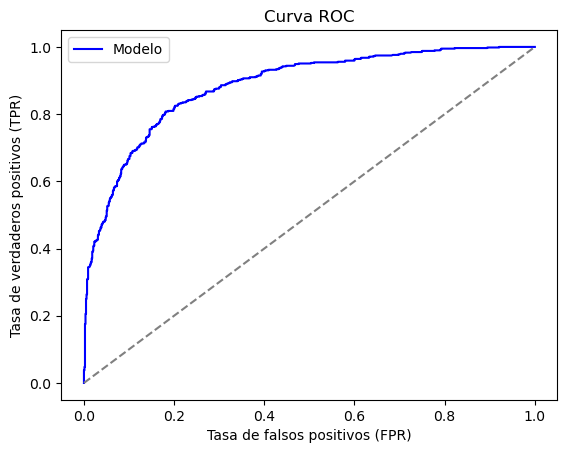

In [40]:
# Calcular el FPR (False Positive Rate) y el TPR (True Positive Rate)
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Crear el gráfico
fig, ax = plt.subplots()

# Graficar la curva ROC
ax.plot(fpr, tpr, label='Modelo', color='blue')

# Graficar la línea diagonal (representando un clasificador aleatorio)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Personalizar el gráfico
ax.set_xlabel('Tasa de falsos positivos (FPR)')
ax.set_ylabel('Tasa de verdaderos positivos (TPR)')
ax.set_title('Curva ROC')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()